In [1]:
import pandas as pd
import sys
sys.path.append('../')
from indexing.preprocess_reference_data import PreprocessReferenceData

## Prep test data

In [2]:
prd = PreprocessReferenceData()

In [3]:
df_tr = pd.read_csv('../indexing/data/splitted_data/v1/train.csv')
df_val = pd.read_csv('../indexing/data/splitted_data/v1/val.csv')
df_test = pd.read_csv('../indexing/data/splitted_data/v1/test.csv')
df_all = pd.concat([df_tr, df_val, df_test])

In [4]:
test_data = prd.create_reference_data_from_labeled(df_all)

In [5]:
test_data

,reference
0,Kemenko Polhukam
1,Polhukam
2,Kemlu
3,Kemlu RI
4,Kementerian BUMN
...,...
932,Indofarma Global Medika
933,Indofarma Global Medika Cabang
934,PT IGM
935,Indofarma


In [6]:
test_data = prd.clean_reference_data(test_data)

In [7]:
test_data

,reference
0,kemenko polhukam
1,polhukam
2,kemlu
3,kemlu ri
4,kementerian bumn
...,...
932,indofarma global medika
933,indofarma global medika cabang
934,pt igm
935,indofarma


In [8]:
test_data.to_csv('./test_data.csv')

In [9]:
cleaned_labeled_data = pd.read_csv('./cleaned_labeled.csv')

## Evaluation

In [10]:
from evaluation import predict_similar_entities

In [11]:
predictions = predict_similar_entities(test_data, cleaned_labeled_data)

In [12]:
predictions.head()

,reference,candidates with edit dist,candidates,true candidates
0,kemenko polhukam,"{'kemenko polhukam': 0, 'polhukam': 8}","[kemenko polhukam, polhukam]","[kemenko polhukam, polhukam, kementerian koord..."
1,polhukam,"{'polhukam': 0, 'kemenko polhukam': 8}","[polhukam, kemenko polhukam]","[kemenko polhukam, polhukam, kementerian koord..."
2,kemlu,"{'kemlu': 0, 'kemlu ri': 3}","[kemlu, kemlu ri]","[kemlu, kemlu ri, kementerian luar negeri]"
3,kemlu ri,"{'kemlu ri': 0, 'kemlu': 3}","[kemlu ri, kemlu]","[kemlu, kemlu ri, kementerian luar negeri]"
4,kementerian bumn,"{'kementerian bumn': 0, 'kemen bumn': 6, 'keme...","[kementerian bumn, kemen bumn, kementerian bad...","[kementerian bumn, kemen bumn, kementerian bad..."


In [13]:
from evaluation import calc_accuracy_pct

In [14]:
predictions = calc_accuracy_pct(predictions)

In [17]:
predictions.to_csv('./eval/performance_v1.csv')

## Analysis

In [24]:
import seaborn as sns

In [22]:
agg = predictions.groupby('accuracy pcts')[['candidates']].count()

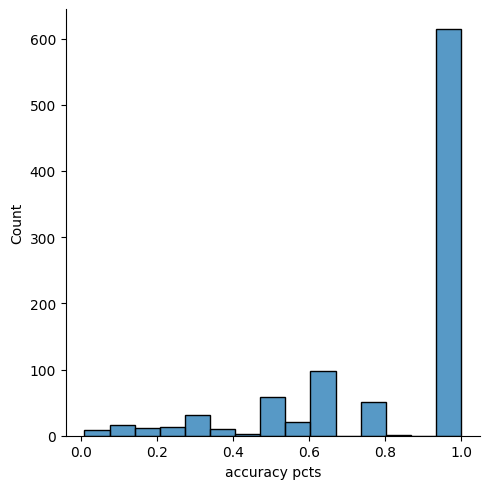

In [30]:
sns.displot(predictions['accuracy pcts'])

In [33]:
agg

,candidates
accuracy pcts,
0.008368,1
0.009302,1
0.011299,1
0.017094,1
0.035088,1
0.039474,1
0.044444,1
0.048780,1
0.057143,1
